# Online Shopper Intention Dataset

### CRIPS - DM Methodology
 1. Bussiness Understanding.
 2. Data Understanding. 
 3. Data Preparation.
 4. Modelling. 
 5. Evaluation. 
 6. Deplotment.

#### 1.Bussiness Understanding


- The Data set hold user session data from an e-commerce website collected over a period of one year.
- The Session represent a unique user. 
- The goal is to 

### 2.Data Understanding.

#### 2.1 Dependecies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

#### 2.1 Load the dataset

In [3]:
#arbitrary seed for reproducibility
np.random.seed(96)

In [4]:
#load data in to a pandas dataframe
df = pd.read_csv('../data/raw/online_shoppers_intention.csv')

##### 2.2 Display the basic information

In [5]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330.0,NaN,NaN,NaN,2.315166,3.321784,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12330.0,NaN,NaN,NaN,80.818611,176.779107,0.0,0.0,7.5,93.25625,3398.75
Informational,12330.0,NaN,NaN,NaN,0.503569,1.270156,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12330.0,NaN,NaN,NaN,34.472398,140.749294,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12330.0,NaN,NaN,NaN,31.731468,44.475503,0.0,7.0,18.0,38.0,705.0
ProductRelated_Duration,12330.0,NaN,NaN,NaN,1194.74622,1913.669288,0.0,184.1375,598.936905,1464.157214,63973.52223
BounceRates,12330.0,NaN,NaN,NaN,0.022191,0.048488,0.0,0.0,0.003112,0.016813,0.2
ExitRates,12330.0,NaN,NaN,NaN,0.043073,0.048597,0.0,0.014286,0.025156,0.05,0.2
PageValues,12330.0,NaN,NaN,NaN,5.889258,18.568437,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12330.0,NaN,NaN,NaN,0.061427,0.198917,0.0,0.0,0.0,0.0,1.0


In [8]:
print("Missing values")
print(df.isnull().sum())

Missing values
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [1]:
print("\nDuplicate values in rows:", df.duplicated().sum())

# Display the duplicate rows
df[df.duplicated(keep=False)]


NameError: name 'df' is not defined

In [11]:
print("\nUnique values in each column:")
print(df.nunique())


Unique values in each column:
Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


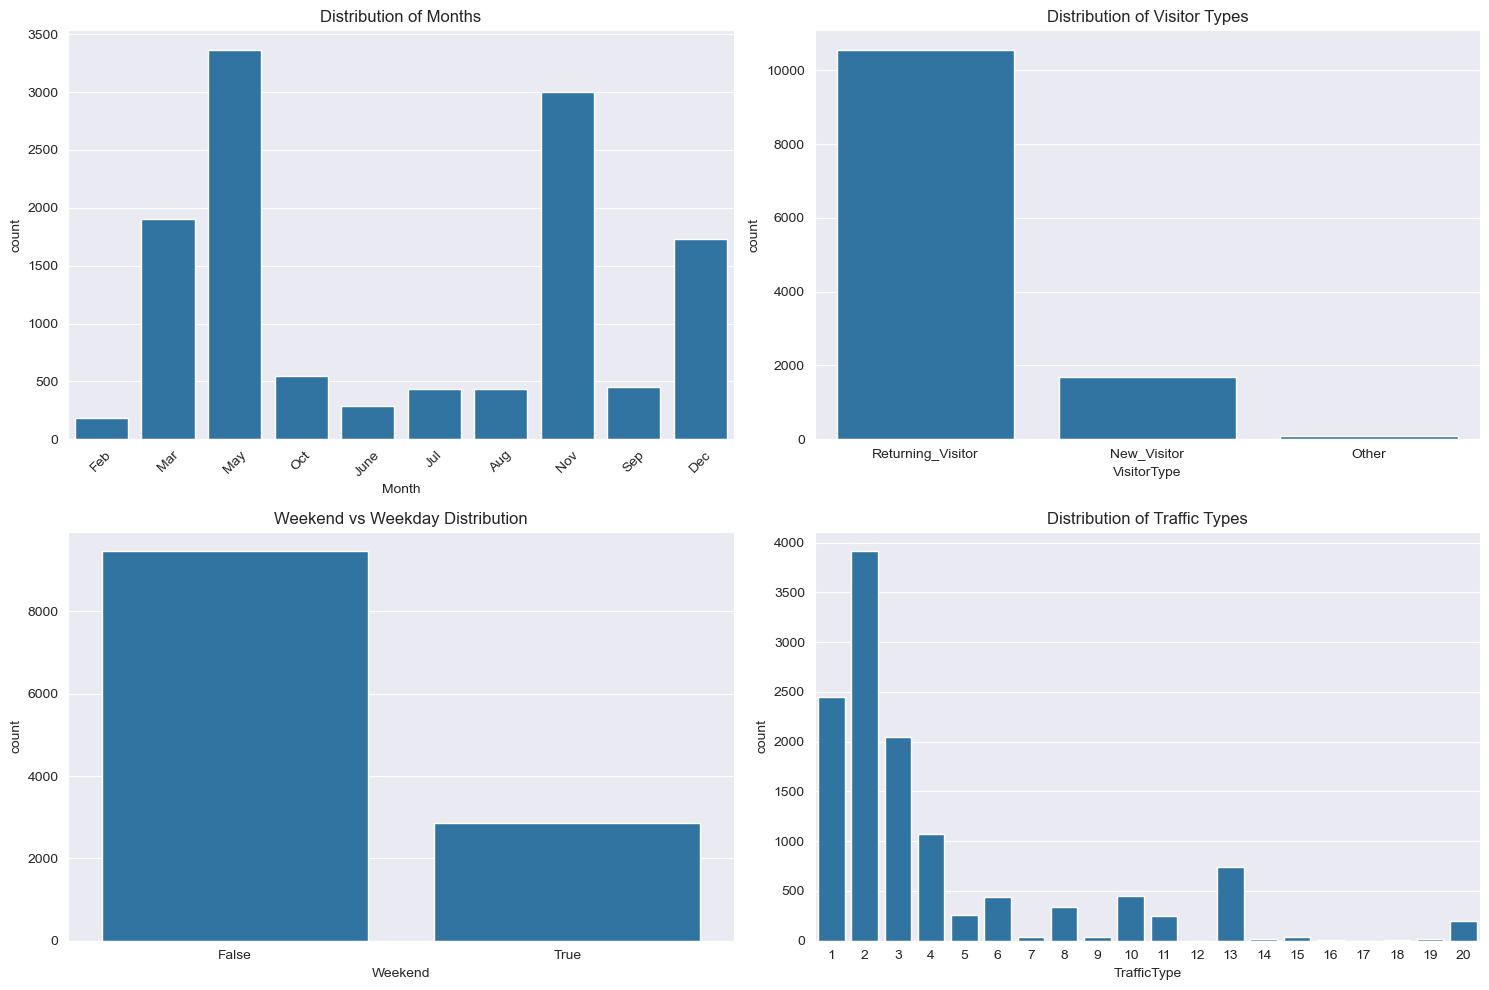

In [16]:
# Set style for better visualizations
sns.set_style('darkgrid')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Month distribution
sns.countplot(data=df, x='Month', ax=axes[0,0])
axes[0,0].set_title('Distribution of Months')
axes[0,0].tick_params(axis='x', rotation=45)

# Visitor Type distribution
sns.countplot(data=df, x='VisitorType', ax=axes[0,1])
axes[0,1].set_title('Distribution of Visitor Types')

# Weekend distribution
sns.countplot(data=df, x='Weekend', ax=axes[1,0])
axes[1,0].set_title('Weekend vs Weekday Distribution')

# Traffic Type distribution
sns.countplot(data=df, x='TrafficType', ax=axes[1,1])
axes[1,1].set_title('Distribution of Traffic Types')

plt.tight_layout()
plt.show()

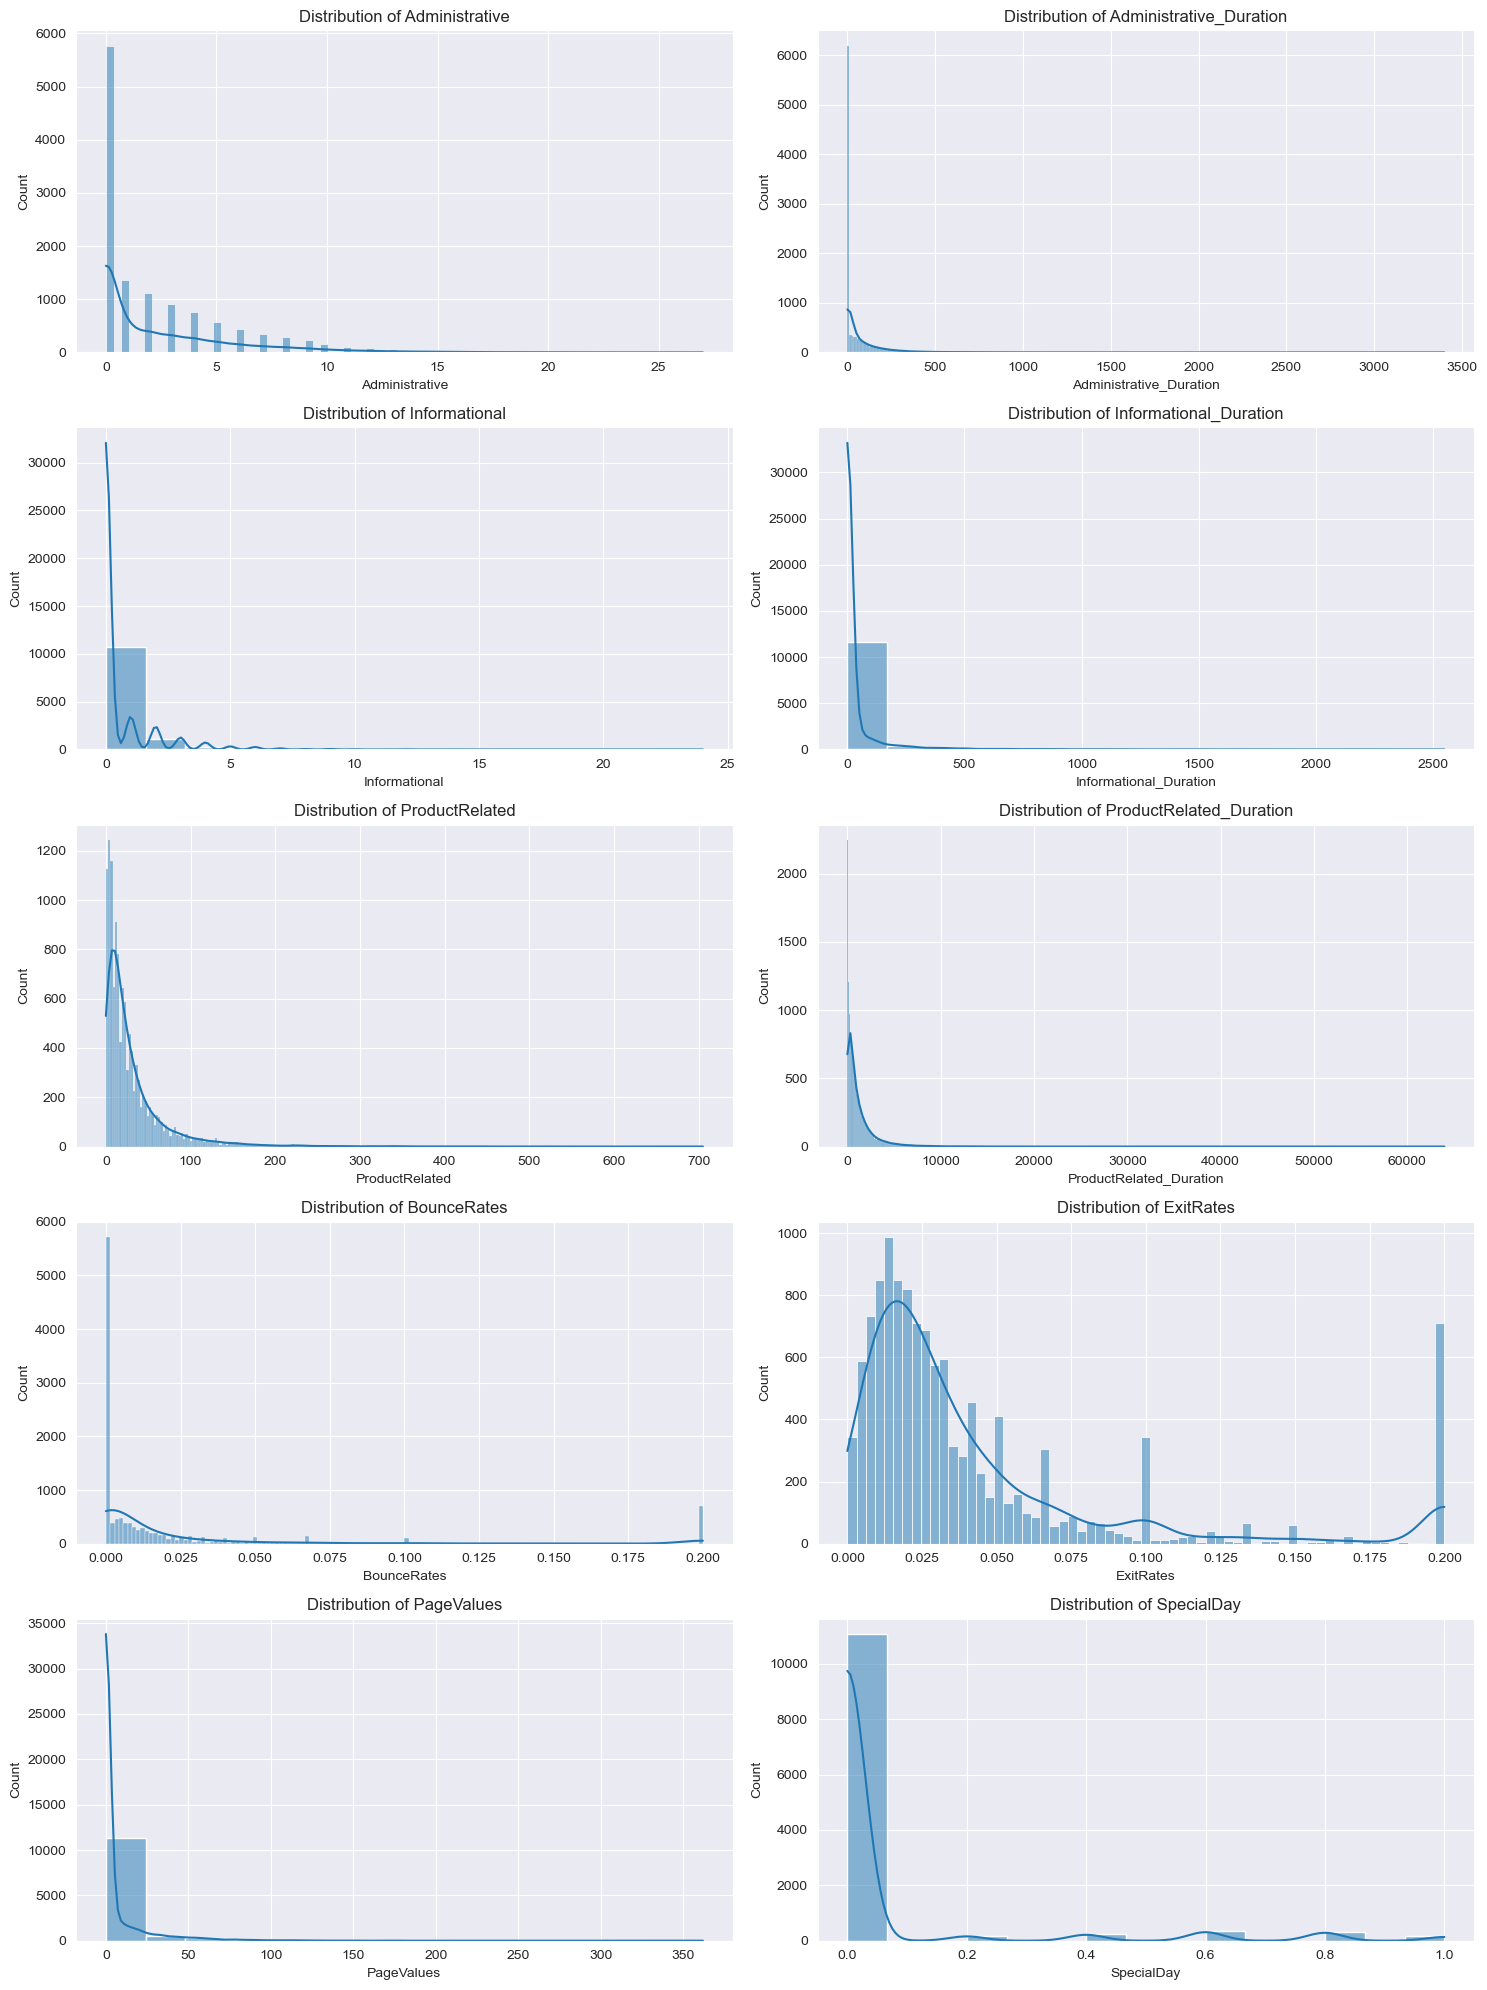

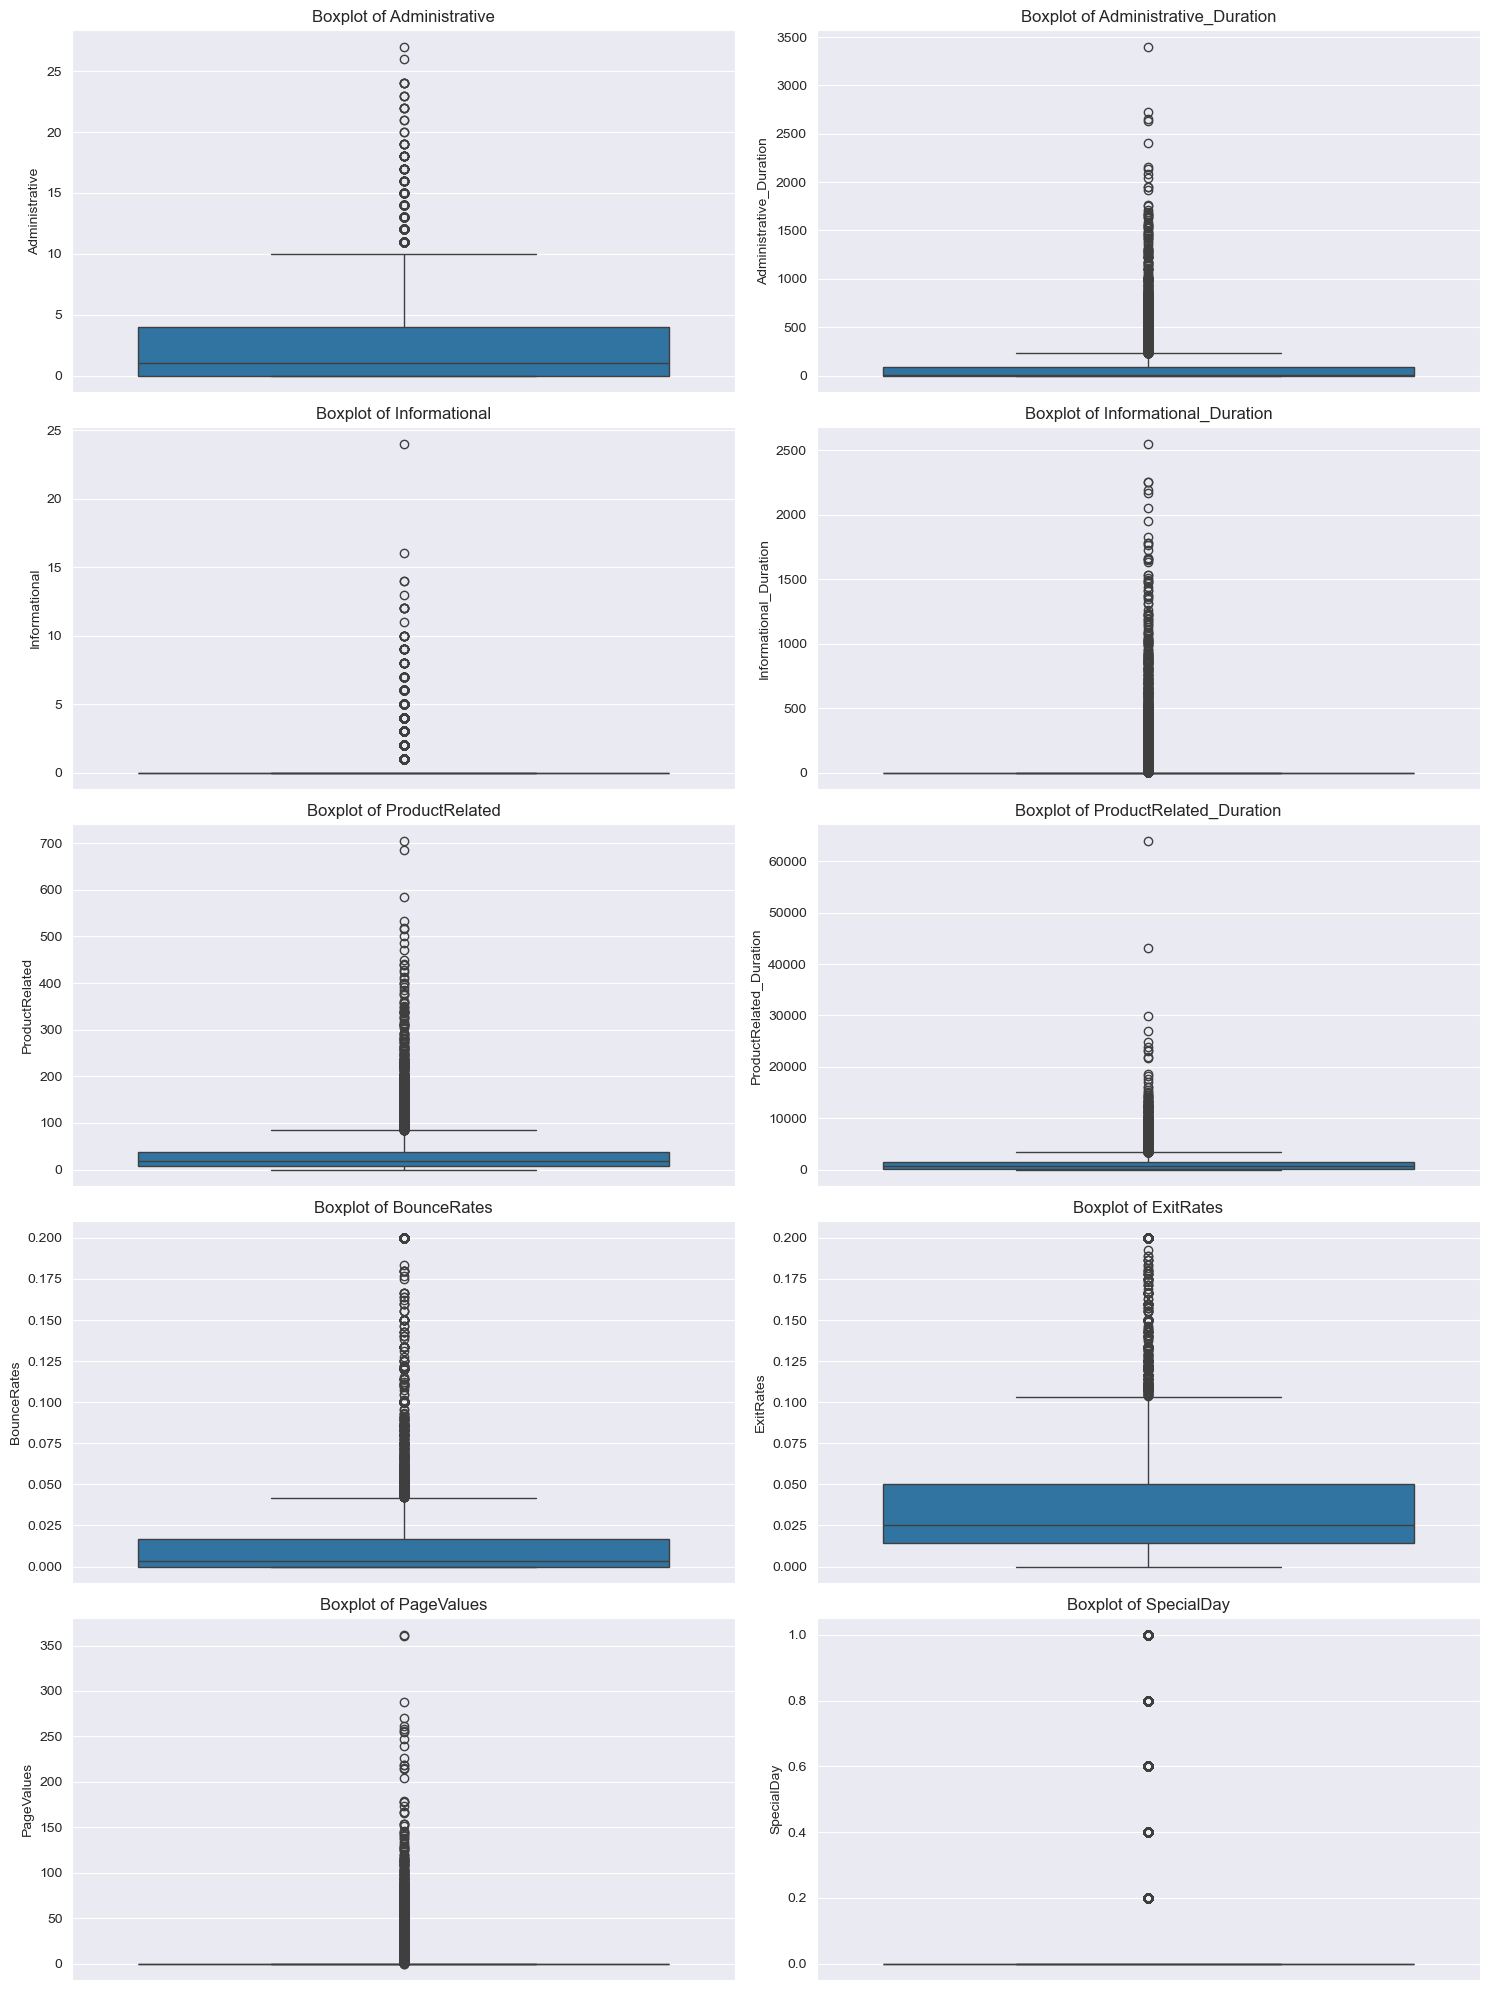

In [17]:
# Create distribution plots for numerical variables
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

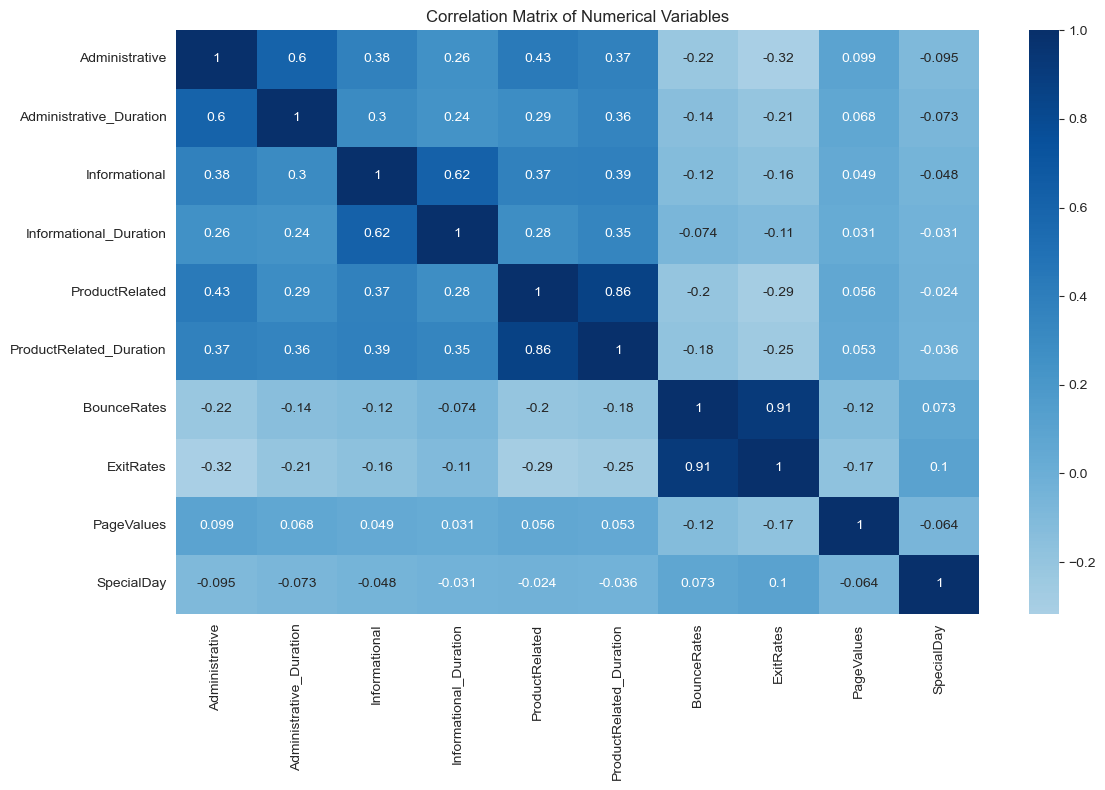

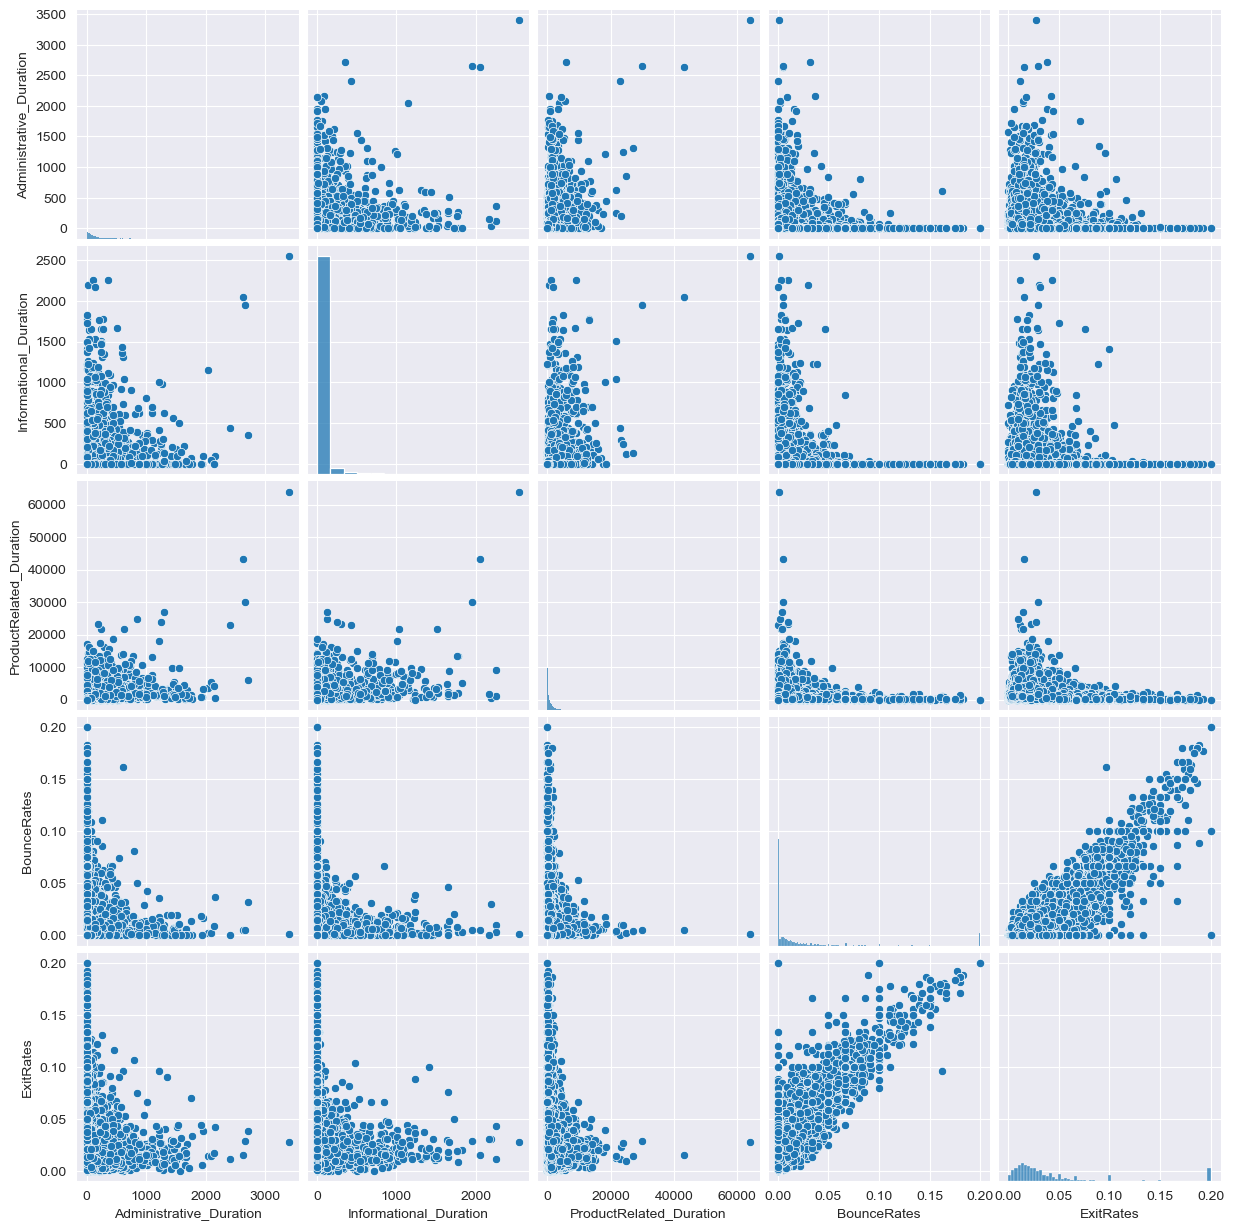

In [20]:
# Correlation matrix for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Pairplot for key numerical variables
sns.pairplot(df[['Administrative_Duration', 'Informational_Duration', 
                 'ProductRelated_Duration', 'BounceRates', 'ExitRates']])
plt.show()

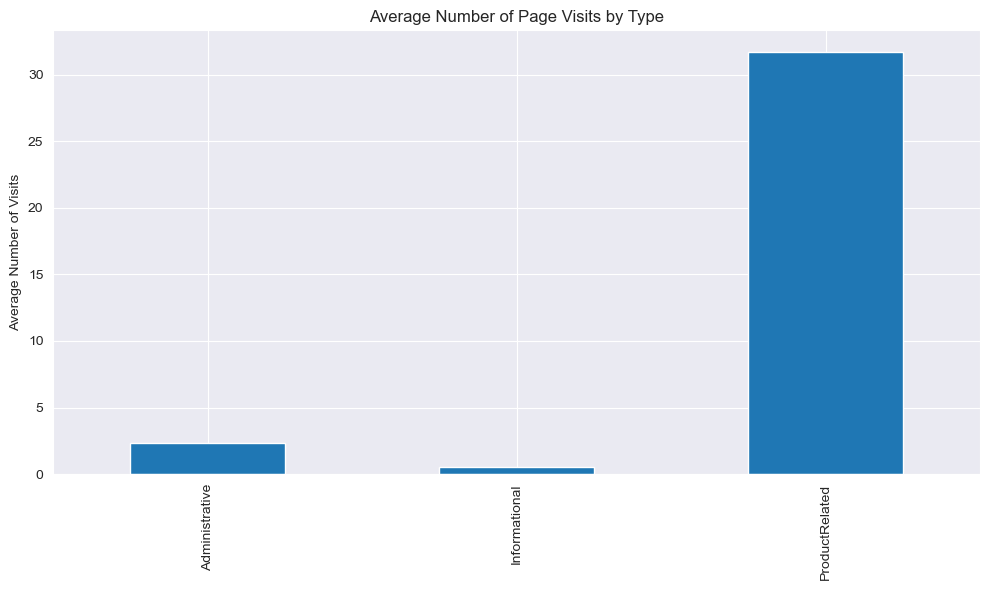

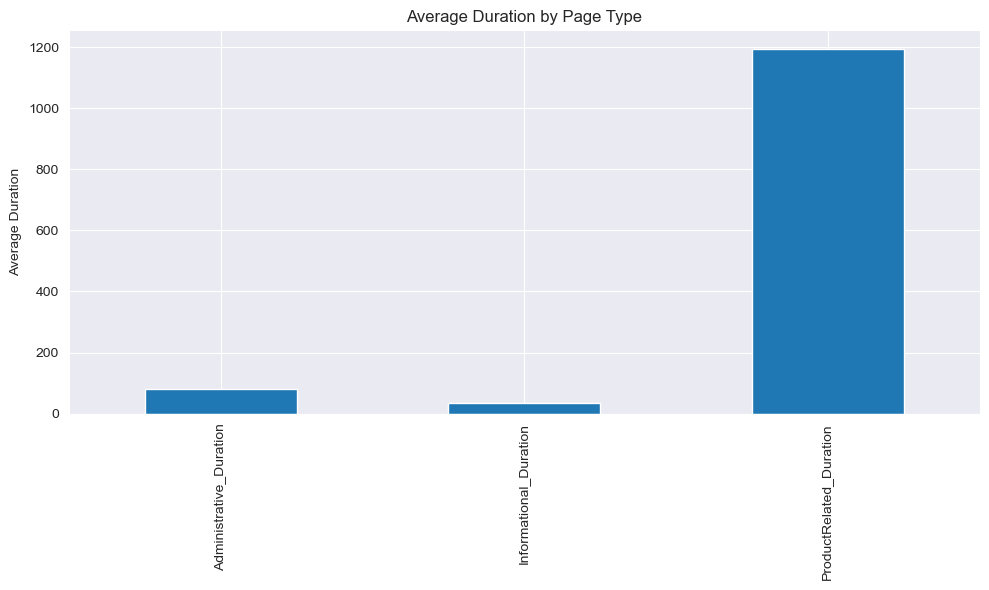

In [21]:
# Create a comparison of different page types
page_metrics = df[['Administrative', 'Informational', 'ProductRelated']].mean()
plt.figure(figsize=(10, 6))
page_metrics.plot(kind='bar')
plt.title('Average Number of Page Visits by Type')
plt.ylabel('Average Number of Visits')
plt.tight_layout()
plt.show()

# Duration analysis
duration_metrics = df[['Administrative_Duration', 'Informational_Duration', 
                      'ProductRelated_Duration']].mean()
plt.figure(figsize=(10, 6))
duration_metrics.plot(kind='bar')
plt.title('Average Duration by Page Type')
plt.ylabel('Average Duration')
plt.tight_layout()
plt.show()

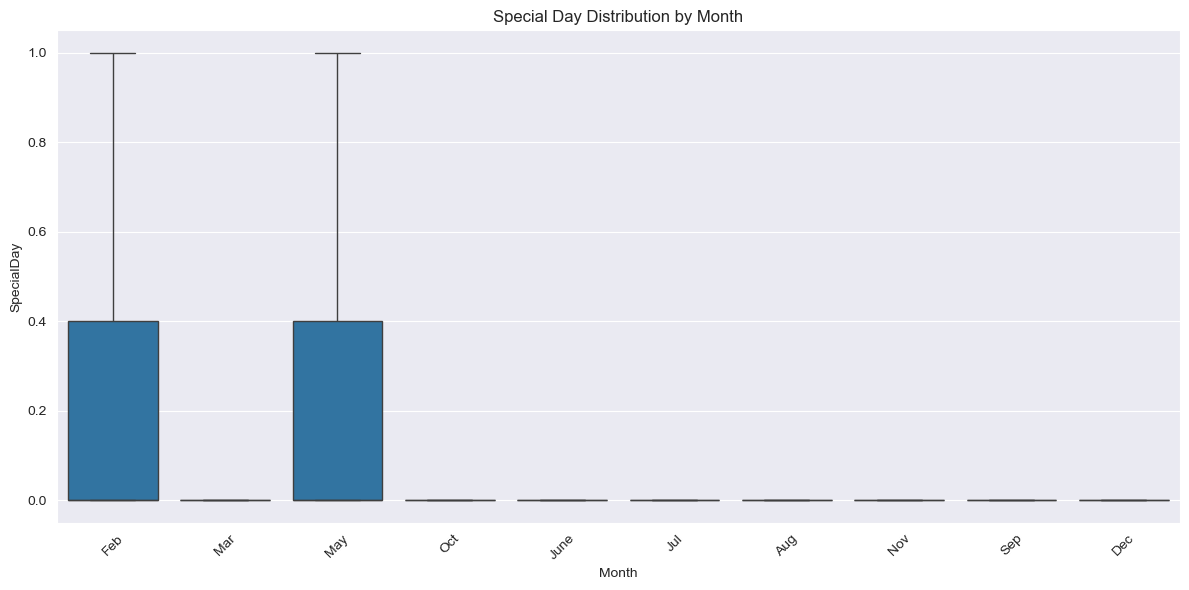

In [22]:
# Special Day distribution by Month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='SpecialDay')
plt.title('Special Day Distribution by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Summary statistics for numerical variables by visitor type
print("Summary statistics by visitor type:\n")
print(df.groupby('VisitorType')[numerical_cols].mean())

# Summary statistics for weekend vs weekday
print("\nSummary statistics by weekend:")
print(df.groupby('Weekend')[numerical_cols].mean())

Summary statistics by visitor type:

                   Administrative  Administrative_Duration  Informational  \
VisitorType                                                                 
New_Visitor              2.551948                91.911315       0.333530   
Other                    1.470588                62.695588       0.176471   
Returning_Visitor        2.283954                79.183639       0.533504   

                   Informational_Duration  ProductRelated  \
VisitorType                                                 
New_Visitor                     19.237472       18.054900   
Other                           11.685490       12.470588   
Returning_Visitor               37.101992       34.082457   

                   ProductRelated_Duration  BounceRates  ExitRates  \
VisitorType                                                          
New_Visitor                     636.393354     0.005261   0.020681   
Other                           570.404862     0.038551   0.0

Session Duration Statistics:
count    12330.000000
mean      1310.037228
std       2037.801702
min          0.000000
25%        222.000000
50%        680.000000
75%       1626.908333
max      69921.647230
Name: TotalDuration, dtype: float64


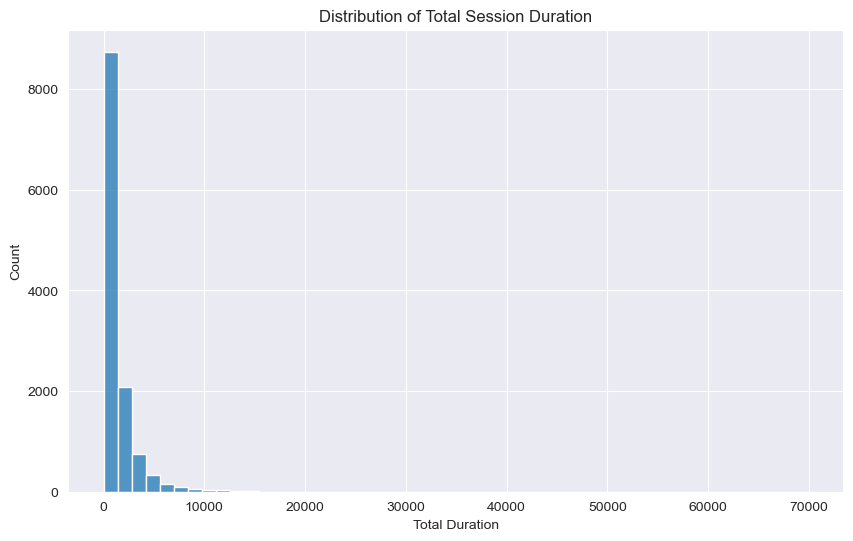

In [25]:
# Calculate and display session duration statistics
df['TotalDuration'] = (df['Administrative_Duration'] + 
                       df['Informational_Duration'] + 
                       df['ProductRelated_Duration'])

print("Session Duration Statistics:")
print(df['TotalDuration'].describe())

# Visualize total duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalDuration', bins=50)
plt.title('Distribution of Total Session Duration')
plt.xlabel('Total Duration')
plt.show()

### 3.Data Preparation

In [26]:
df.shape

(12330, 19)

In [27]:
# Feature Engineering
# Create new features for better clustering
# Calculate engagement ratios and page type preferences

# Create engagement ratios
df['avg_time_per_page'] = (df['Administrative_Duration'] + df['Informational_Duration'] + 
                          df['ProductRelated_Duration']) / (df['Administrative'] + 
                          df['Informational'] + df['ProductRelated'] + 1)

In [28]:
# Create page type preference ratios
total_pages = df['Administrative'] + df['Informational'] + df['ProductRelated'] + 1
df['admin_ratio'] = df['Administrative'] / total_pages
df['info_ratio'] = df['Informational'] / total_pages
df['product_ratio'] = df['ProductRelated'] / total_pages

In [29]:
# Create duration ratios
total_duration = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration'] + 1
df['admin_duration_ratio'] = df['Administrative_Duration'] / total_duration
df['info_duration_ratio'] = df['Informational_Duration'] / total_duration
df['product_duration_ratio'] = df['ProductRelated_Duration'] / total_duration


In [30]:
# Display new features
print("New features created. Sample of the engineered features:")
df[['avg_time_per_page', 'admin_ratio', 'info_ratio', 'product_ratio', 
    'admin_duration_ratio', 'info_duration_ratio', 'product_duration_ratio']].head()


New features created. Sample of the engineered features:


,avg_time_per_page,admin_ratio,info_ratio,product_ratio,admin_duration_ratio,info_duration_ratio,product_duration_ratio
0,0.000000,0.0,0.0,0.500000,0.0,0.0,0.000000
1,21.333333,0.0,0.0,0.666667,0.0,0.0,0.984615
2,0.000000,0.0,0.0,0.500000,0.0,0.0,0.000000
3,0.888889,0.0,0.0,0.666667,0.0,0.0,0.727273
4,57.045455,0.0,0.0,0.909091,0.0,0.0,0.998409


In [32]:
clustering_features = [
    'avg_time_per_page', 
    'admin_ratio', 'info_ratio', 'product_ratio',
    'admin_duration_ratio', 'info_duration_ratio', 'product_duration_ratio',
    'BounceRates', 'ExitRates', 'PageValues'
]

In [33]:
# Create feature matrix
X = df[clustering_features].copy()

In [34]:
# Handle any missing values
X = X.fillna(0)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features prepared for clustering.")
print("Feature matrix shape:", X_scaled.shape)

Features prepared for clustering.
Feature matrix shape: (12330, 10)


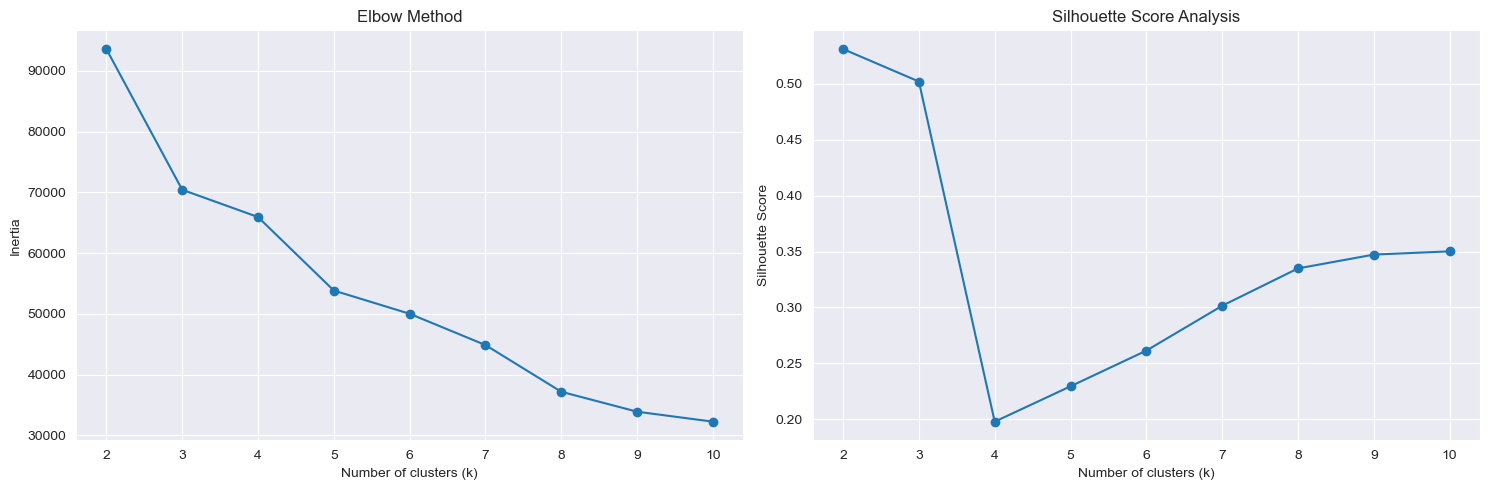

In [37]:
# Perform Elbow Method Analysis



from sklearn.cluster import KMeans


max_clusters = 10
inertias = []
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Inertia plot
ax1.plot(range(2, max_clusters + 1), inertias, marker='o')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True)

# Silhouette score plot
ax2.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score Analysis')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [38]:
# Print the scores
for k in range(len(inertias)):
    print(f"k={k+2}: Inertia={inertias[k]:.2f}, Silhouette Score={silhouette_scores[k]:.3f}")

k=2: Inertia=93594.53, Silhouette Score=0.531
k=3: Inertia=70434.91, Silhouette Score=0.502
k=4: Inertia=65943.00, Silhouette Score=0.198
k=5: Inertia=53842.70, Silhouette Score=0.230
k=6: Inertia=50018.35, Silhouette Score=0.261
k=7: Inertia=44868.63, Silhouette Score=0.302
k=8: Inertia=37178.13, Silhouette Score=0.335
k=9: Inertia=33899.42, Silhouette Score=0.347
k=10: Inertia=32256.42, Silhouette Score=0.350


In [39]:
# After analyzing the elbow plot, perform clustering with optimal k
# Replace optimal_k with the value you choose based on the elbow plot
optimal_k = 4  # This is an example, adjust based on your analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [40]:
df['Cluster'] = cluster_labels

In [41]:
# Analyze cluster sizes
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nCluster sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} samples ({size/len(cluster_labels)*100:.2f}%)")


Cluster sizes:
Cluster 0: 7816 samples (63.39%)
Cluster 1: 1761 samples (14.28%)
Cluster 2: 2038 samples (16.53%)
Cluster 3: 715 samples (5.80%)


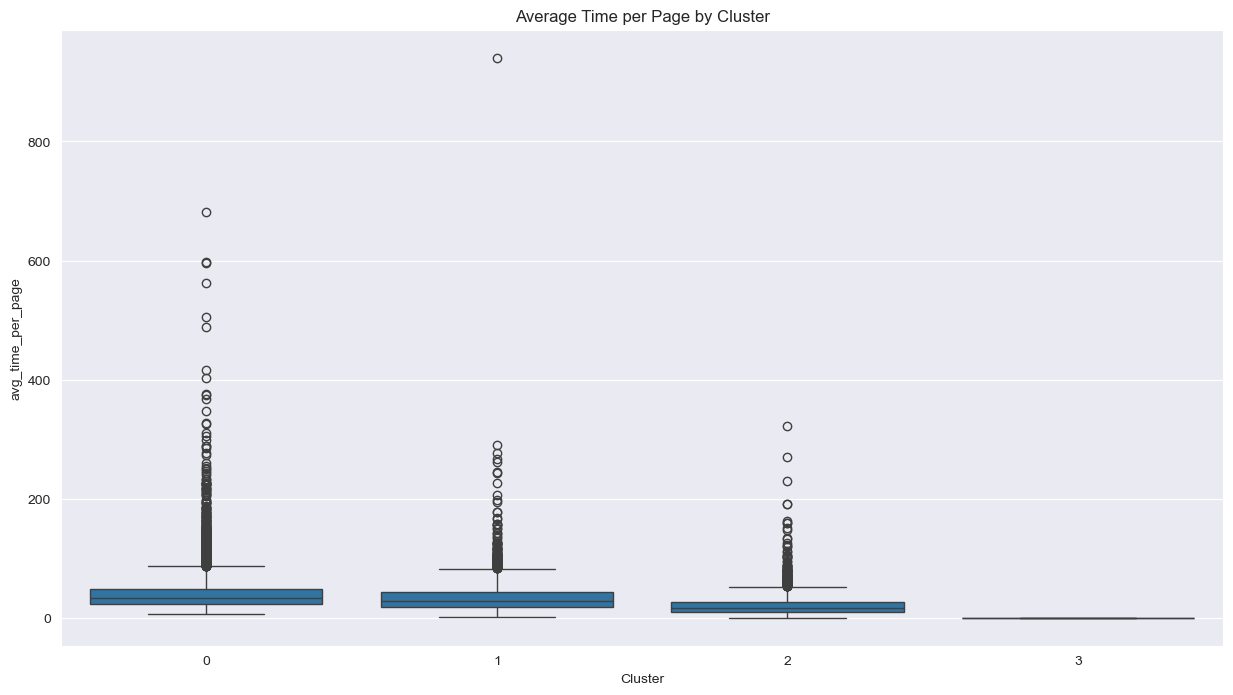

In [42]:
# Visualize cluster characteristics
plt.figure(figsize=(15, 8))
sns.boxplot(x='Cluster', y='avg_time_per_page', data=df)
plt.title('Average Time per Page by Cluster')
plt.show()

In [43]:
# Create profile for each cluster
cluster_profiles = df.groupby('Cluster')[clustering_features].mean()
print("\nCluster Profiles:")
print(cluster_profiles)


Cluster Profiles:
         avg_time_per_page  admin_ratio  info_ratio  product_ratio  \
Cluster                                                              
0                41.275887     0.052334    0.009406       0.892026   
1                35.728322     0.273128    0.048886       0.599616   
2                21.312836     0.008226    0.001583       0.829743   
3                 0.000000     0.008205    0.003613       0.533278   

         admin_duration_ratio  info_duration_ratio  product_duration_ratio  \
Cluster                                                                      
0                    0.045214             0.011790                0.941378   
1                    0.348012             0.079831                0.567189   
2                    0.005842             0.000804                0.972828   
3                    0.000000             0.000000                0.000000   

         BounceRates  ExitRates  PageValues  
Cluster                                      

In [45]:
output_path = '../data/processed/Task_2_processed/clustered_data.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"\nProcessed data saved to {output_path}")


Processed data saved to ../data/processed/Task_2_processed/clustered_data.csv


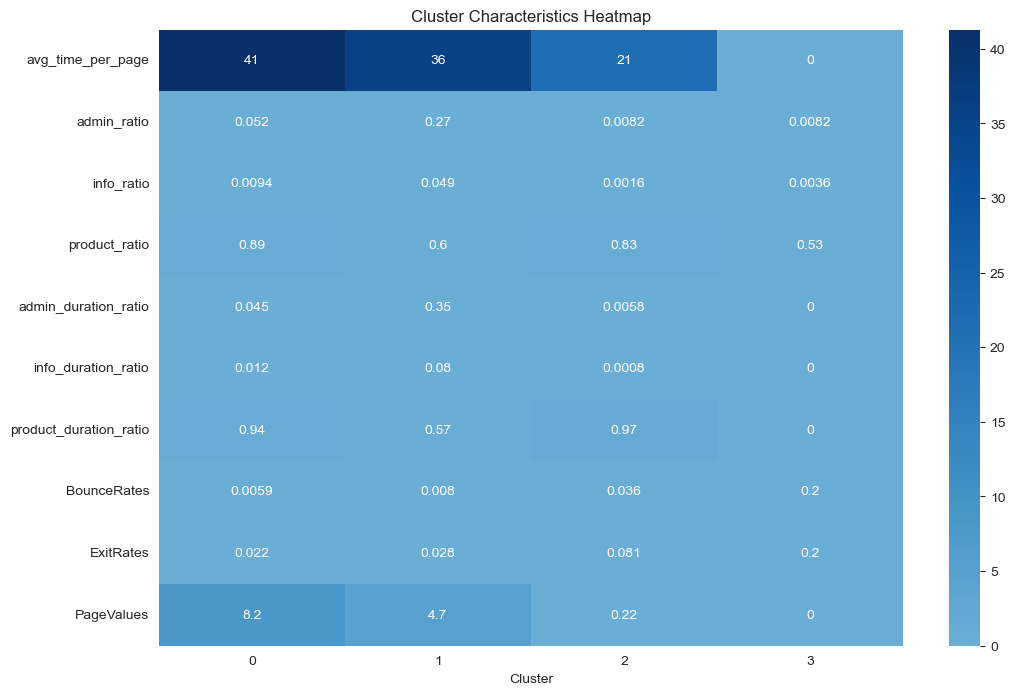

In [47]:
# Additional visualization: Cluster characteristics heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profiles.T, annot=True, cmap='Blues', center=0)
plt.title('Cluster Characteristics Heatmap')
plt.show()

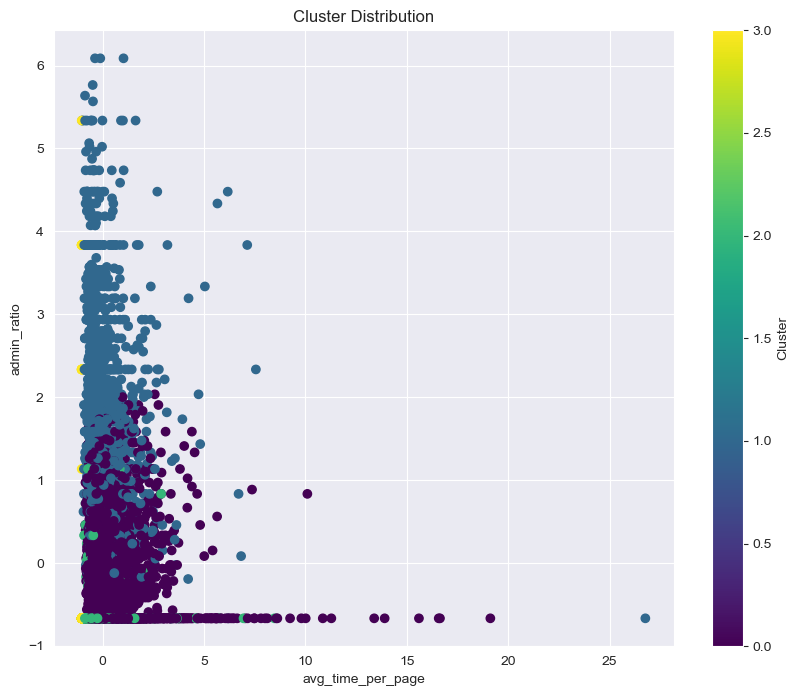

In [48]:
# Scatter plot of two main components with cluster colors
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel(clustering_features[0])
plt.ylabel(clustering_features[1])
plt.title('Cluster Distribution')
plt.colorbar(label='Cluster')
plt.show()

### 4.Modeling 

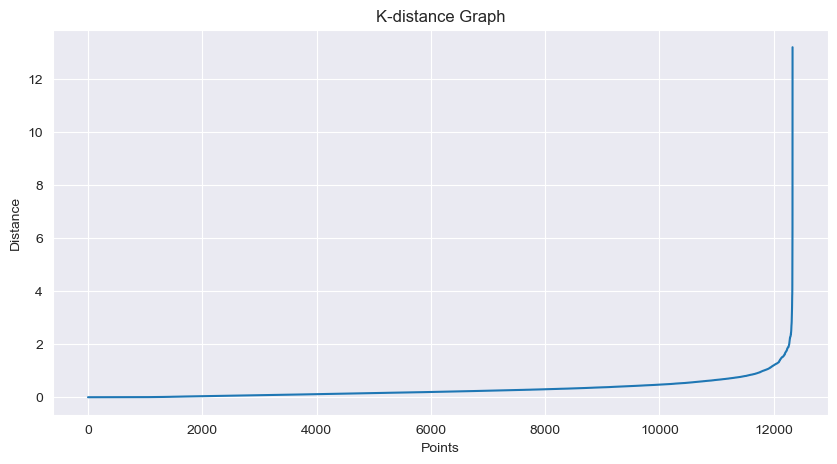

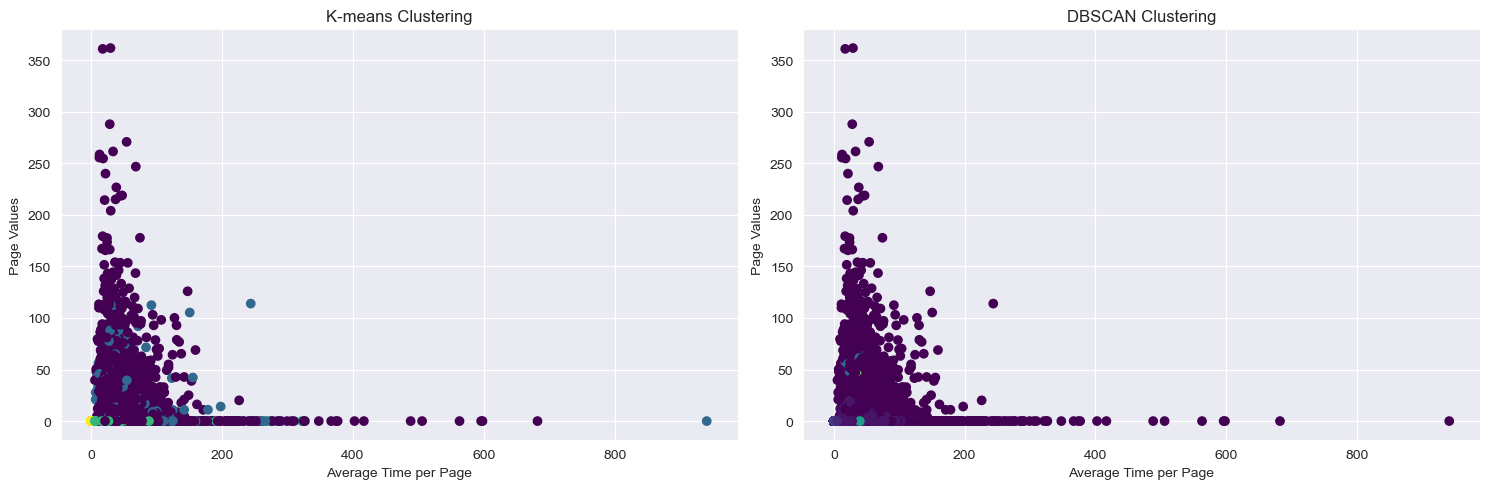

K-means Silhouette Score: 0.198
DBSCAN Silhouette Score: -0.091

K-means Cluster Profiles:
   avg_time_per_page  PageValues  BounceRates  ExitRates  Revenue  Weekend  \
0             41.276       8.164        0.006      0.022    0.205    0.243   
1             35.728       4.742        0.008      0.028    0.148    0.256   
2             21.313       0.223        0.036      0.081    0.019    0.193   
3              0.000       0.000        0.197      0.200    0.004    0.178   

   VisitorType  
0        0.863  
1        0.672  
2        0.960  
3        0.937  

DBSCAN Cluster Profiles:
     avg_time_per_page  PageValues  BounceRates  ExitRates  Revenue  Weekend  \
-1              45.419      11.739        0.013      0.033    0.250    0.243   
 0               0.000       0.000        0.200      0.200    0.002    0.181   
 1              11.957       0.000        0.000      0.100    0.000    0.234   
 2              30.289       0.822        0.009      0.029    0.083    0.232   
 3     

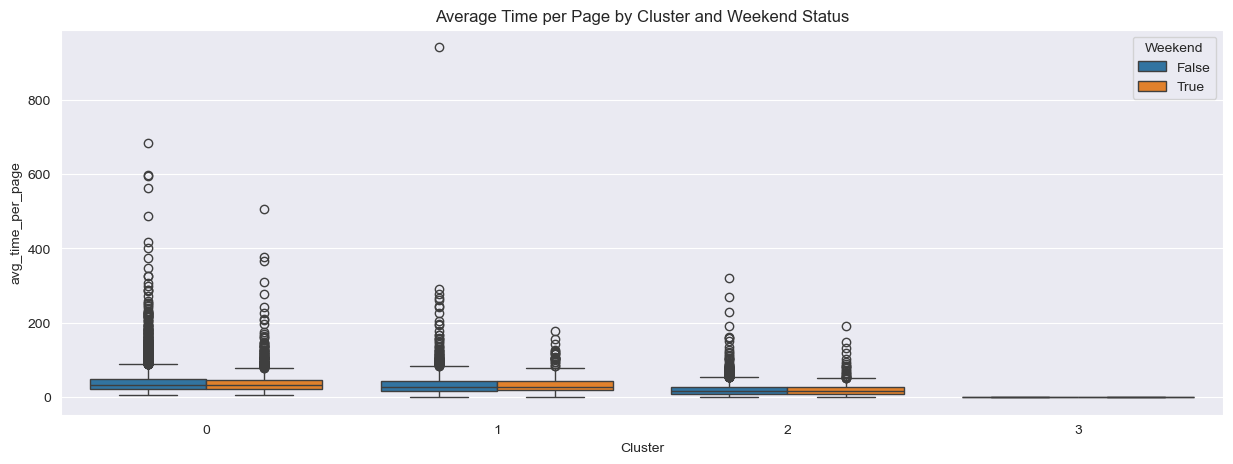

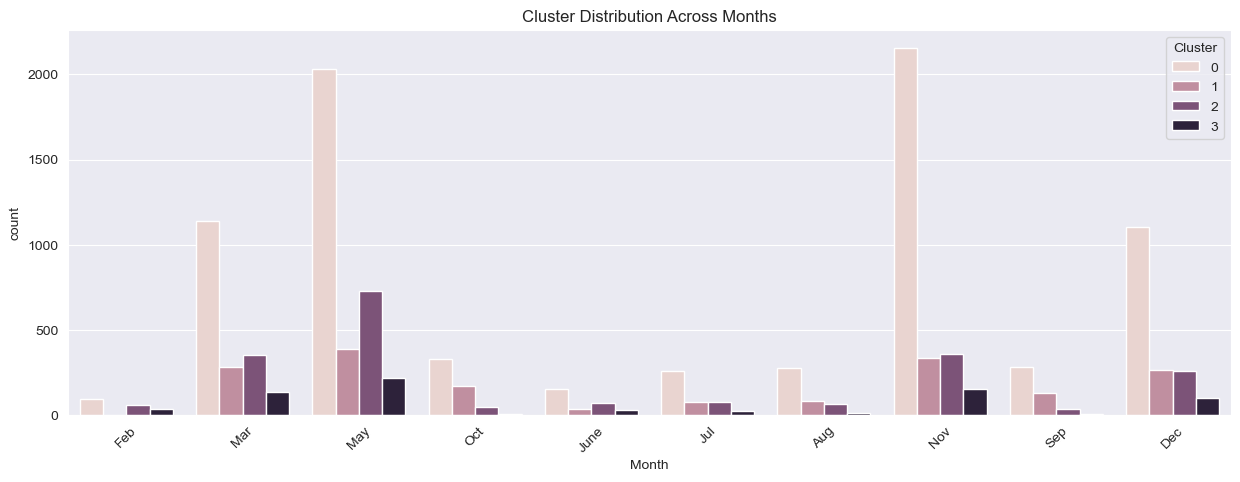

In [49]:
# Enhanced statistical analysis for K-means clusters
def analyze_kmeans_clusters(df, cluster_labels):
    # Add temporal analysis
    df['Cluster'] = cluster_labels
    
    # Detailed cluster statistics
    cluster_stats = pd.DataFrame()
    
    for cluster in range(len(np.unique(cluster_labels))):
        cluster_data = df[df['Cluster'] == cluster]
        stats = {
            'Size': len(cluster_data),
            'Size_Percentage': len(cluster_data) / len(df) * 100,
            'Avg_Session_Duration': cluster_data['avg_time_per_page'].mean(),
            'Avg_Page_Value': cluster_data['PageValues'].mean(),
            'Weekend_Percentage': cluster_data['Weekend'].mean() * 100,
            'Revenue_Rate': cluster_data['Revenue'].mean() * 100,
            'Return_Visitor_Rate': (cluster_data['VisitorType'] == 'Returning_Visitor').mean() * 100
        }
        cluster_stats = pd.concat([cluster_stats, pd.DataFrame([stats])], ignore_index=True)
    
    cluster_stats.index = [f'Cluster_{i}' for i in range(len(cluster_stats))]
    return cluster_stats

# Visualize temporal patterns
def plot_temporal_patterns(df):
    plt.figure(figsize=(15, 5))
    sns.boxplot(x='Cluster', y='avg_time_per_page', hue='Weekend', data=df)
    plt.title('Average Time per Page by Cluster and Weekend Status')
    plt.show()
    
    plt.figure(figsize=(15, 5))
    sns.countplot(x='Month', hue='Cluster', data=df)
    plt.title('Cluster Distribution Across Months')
    plt.xticks(rotation=45)
    plt.show()

# Now let's implement DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def find_optimal_eps(X, n_neighbors=2):
    # Calculate distances to nearest neighbors
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    # Sort and plot distances
    distances = np.sort(distances[:, n_neighbors-1])
    plt.figure(figsize=(10, 5))
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.xlabel('Points')
    plt.ylabel('Distance')
    plt.show()
    
    return distances

def apply_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X)
    return dbscan_labels

# Compare clustering results
def compare_clustering_results(df, kmeans_labels, dbscan_labels):
    plt.figure(figsize=(15, 5))
    
    # K-means plot
    plt.subplot(1, 2, 1)
    plt.scatter(df['avg_time_per_page'], df['PageValues'], c=kmeans_labels, cmap='viridis')
    plt.title('K-means Clustering')
    plt.xlabel('Average Time per Page')
    plt.ylabel('Page Values')
    
    # DBSCAN plot
    plt.subplot(1, 2, 2)
    plt.scatter(df['avg_time_per_page'], df['PageValues'], c=dbscan_labels, cmap='viridis')
    plt.title('DBSCAN Clustering')
    plt.xlabel('Average Time per Page')
    plt.ylabel('Page Values')
    
    plt.tight_layout()
    plt.show()

# Evaluate clusters
def evaluate_clusters(X, kmeans_labels, dbscan_labels):
    # Silhouette score for K-means
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    
    # Silhouette score for DBSCAN (excluding noise points)
    dbscan_silhouette = silhouette_score(X[dbscan_labels != -1], 
                                       dbscan_labels[dbscan_labels != -1]) if len(np.unique(dbscan_labels)) > 1 else 0
    
    print(f"K-means Silhouette Score: {kmeans_silhouette:.3f}")
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
    
    return kmeans_silhouette, dbscan_silhouette

# Create cluster profiles
def create_cluster_profiles(df, labels, algorithm_name):
    profiles = df.groupby(labels).agg({
        'avg_time_per_page': 'mean',
        'PageValues': 'mean',
        'BounceRates': 'mean',
        'ExitRates': 'mean',
        'Revenue': 'mean',
        'Weekend': 'mean',
        'VisitorType': lambda x: (x == 'Returning_Visitor').mean()
    }).round(3)
    
    print(f"\n{algorithm_name} Cluster Profiles:")
    print(profiles)
    return profiles

# Let's execute all these analyses
# First, make sure we have our scaled features
X_scaled = StandardScaler().fit_transform(X)

# Find optimal eps for DBSCAN
distances = find_optimal_eps(X_scaled)

# Apply both clustering algorithms
kmeans_labels = kmeans.labels_
dbscan_labels = apply_dbscan(X_scaled, eps=0.3, min_samples=5)  # Adjust eps based on the k-distance graph

# Compare results
compare_clustering_results(df, kmeans_labels, dbscan_labels)

# Evaluate both algorithms
evaluate_clusters(X_scaled, kmeans_labels, dbscan_labels)

# Create profiles for both algorithms
kmeans_profiles = create_cluster_profiles(df, kmeans_labels, "K-means")
dbscan_profiles = create_cluster_profiles(df, dbscan_labels, "DBSCAN")

# Plot temporal patterns for both algorithms
plot_temporal_patterns(df)

### 5.Evaluation


K-means Clustering Evaluation:
--------------------------------------------------
Number of clusters: 4
No noise points

Cluster Sizes:
Cluster 0: 7816 points (63.39%)
Cluster 1: 1761 points (14.28%)
Cluster 2: 2038 points (16.53%)
Cluster 3: 715 points (5.80%)

Validation Metrics:
Silhouette Score: 0.198
Calinski-Harabasz Score: 3573.714
Davies-Bouldin Score: 1.317

DBSCAN Clustering Evaluation:
--------------------------------------------------
Number of clusters: 59
Number of noise points: 5527

Cluster Sizes:
Cluster -1: 5527 points (44.83%)
Cluster 0: 525 points (4.26%)
Cluster 1: 158 points (1.28%)
Cluster 2: 5316 points (43.11%)
Cluster 3: 6 points (0.05%)
Cluster 4: 94 points (0.76%)
Cluster 5: 39 points (0.32%)
Cluster 6: 110 points (0.89%)
Cluster 7: 47 points (0.38%)
Cluster 8: 37 points (0.30%)
Cluster 9: 5 points (0.04%)
Cluster 10: 25 points (0.20%)
Cluster 11: 9 points (0.07%)
Cluster 12: 45 points (0.36%)
Cluster 13: 16 points (0.13%)
Cluster 14: 8 points (0.06%)
Clust

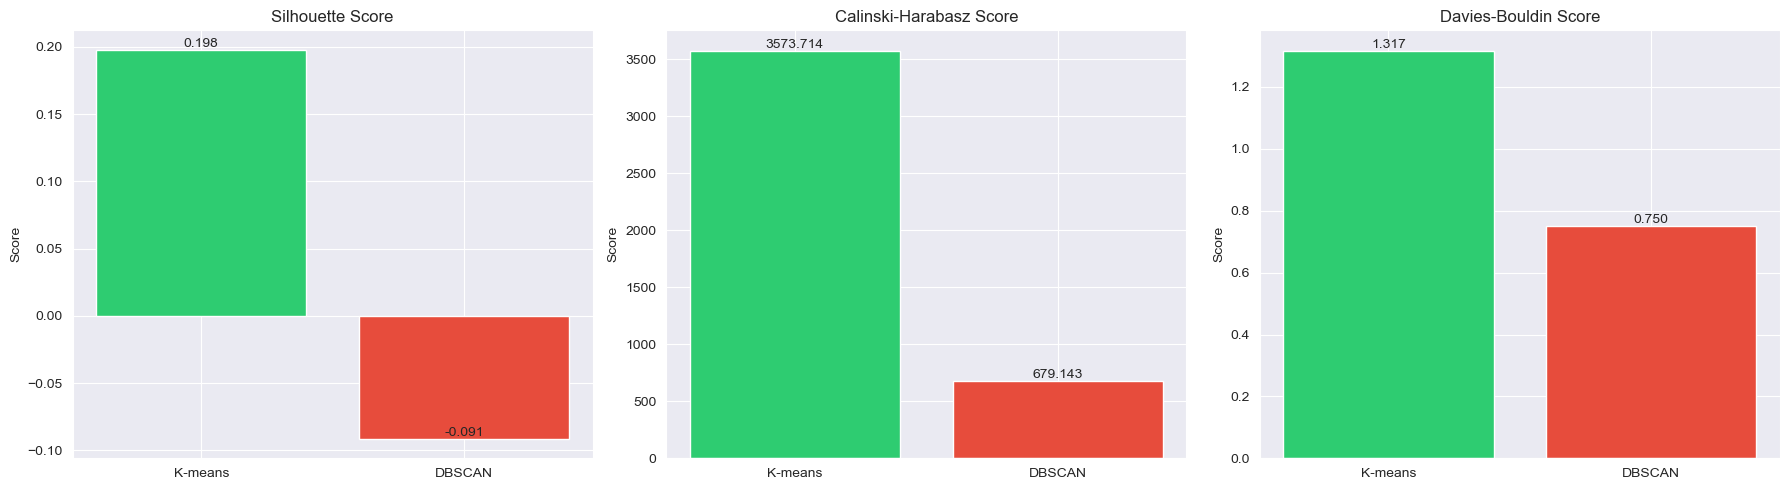

C:\Users\geova\AppData\Local\Temp\ipykernel_4708\3899154916.py:116: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([kmeans_silhouettes, dbscan_silhouettes], labels=['K-means', 'DBSCAN'])


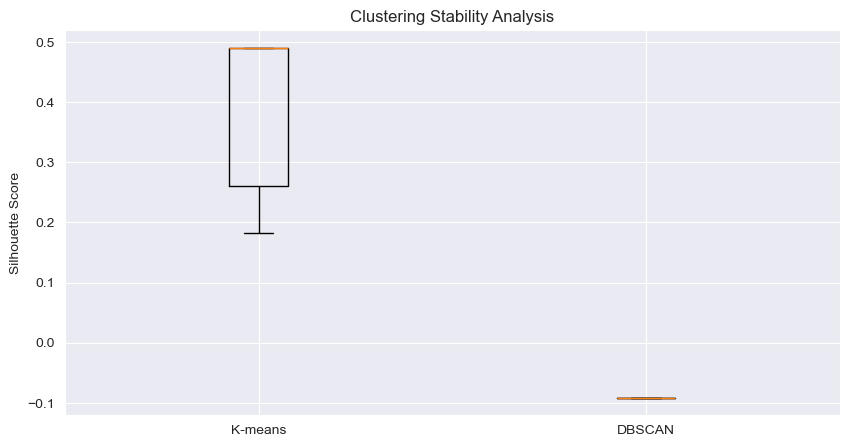

c:\Users\geova\anaconda3\envs\ml_enviroment\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


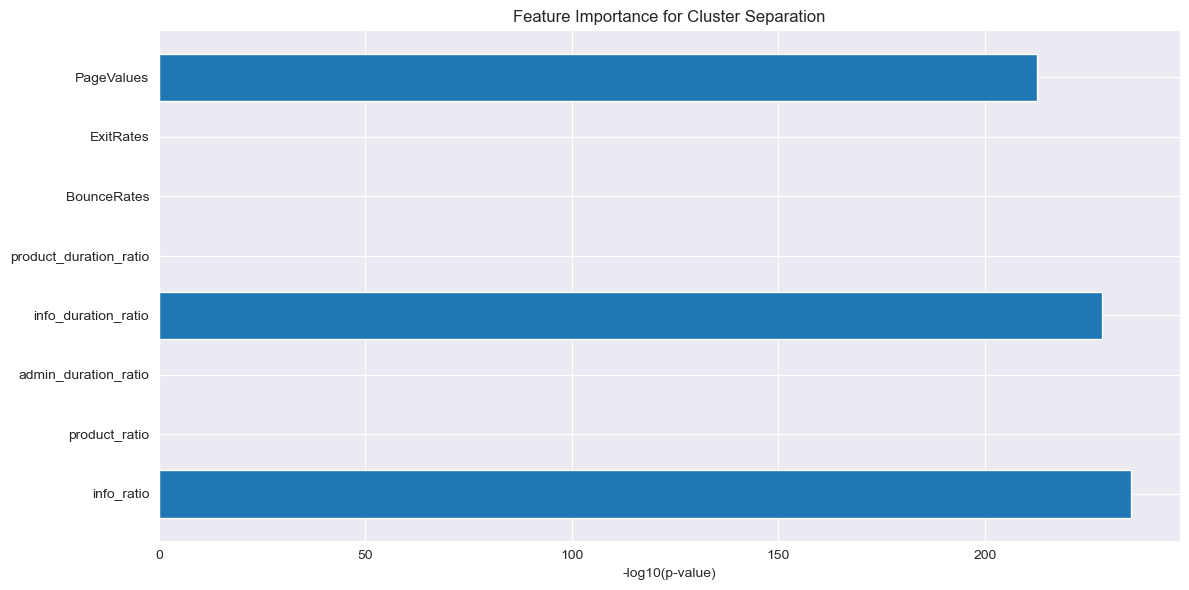

c:\Users\geova\anaconda3\envs\ml_enviroment\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


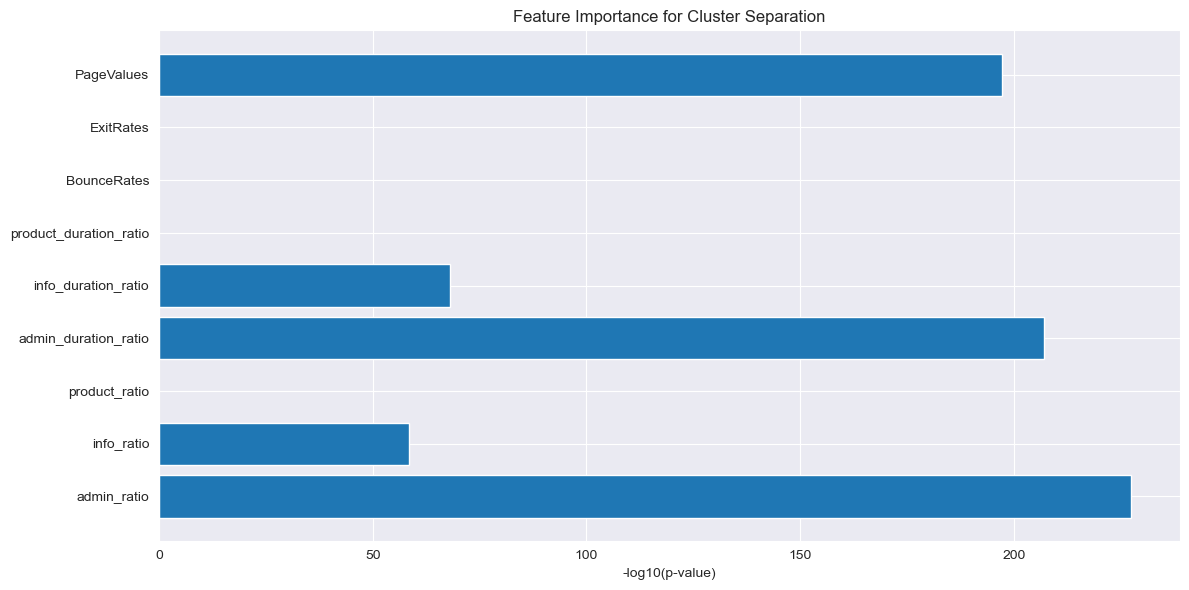


Clustering Evaluation Summary:
--------------------------------------------------

K-means Stability:
Mean Silhouette Score: 0.397 ± 0.134

DBSCAN Stability:
Mean Silhouette Score: -0.091 ± 0.000

Final Comparison Summary:
                    K-means   DBSCAN
Mean Silhouette       0.397   -0.091
Stability (std)       0.134    0.000
Calinski-Harabasz  3573.714  679.143
Davies-Bouldin        1.317    0.750


In [50]:
# Import additional required libraries for evaluation
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler

# Create comprehensive evaluation function
def evaluate_clustering(X, labels, algorithm_name):
    """
    Evaluate clustering results using multiple metrics
    """
    # Remove noise points (-1 labels) if present (for DBSCAN)
    if -1 in labels:
        mask = labels != -1
        X_clean = X[mask]
        labels_clean = labels[mask]
    else:
        X_clean = X
        labels_clean = labels
    
    # Calculate metrics only if we have at least 2 clusters
    if len(np.unique(labels_clean)) >= 2:
        metrics = {
            'Silhouette Score': silhouette_score(X_clean, labels_clean),
            'Calinski-Harabasz Score': calinski_harabasz_score(X_clean, labels_clean),
            'Davies-Bouldin Score': davies_bouldin_score(X_clean, labels_clean)
        }
        
        # Calculate cluster sizes and proportions
        cluster_sizes = pd.Series(labels).value_counts().sort_index()
        total_points = len(labels)
        cluster_props = cluster_sizes / total_points * 100
        
        print(f"\n{algorithm_name} Clustering Evaluation:")
        print("-" * 50)
        print(f"Number of clusters: {len(np.unique(labels))}")
        print(f"Number of noise points: {sum(labels == -1)}" if -1 in labels else "No noise points")
        print("\nCluster Sizes:")
        for cluster, size in cluster_sizes.items():
            print(f"Cluster {cluster}: {size} points ({cluster_props[cluster]:.2f}%)")
        
        print("\nValidation Metrics:")
        print(f"Silhouette Score: {metrics['Silhouette Score']:.3f}")
        print(f"Calinski-Harabasz Score: {metrics['Calinski-Harabasz Score']:.3f}")
        print(f"Davies-Bouldin Score: {metrics['Davies-Bouldin Score']:.3f}")
        
        return metrics
    else:
        print(f"\n{algorithm_name}: Not enough clusters for evaluation")
        return None

# Visualize evaluation metrics
def plot_evaluation_comparison(kmeans_metrics, dbscan_metrics):
    """
    Create comparative visualizations of evaluation metrics
    """
    metrics_df = pd.DataFrame({
        'K-means': kmeans_metrics,
        'DBSCAN': dbscan_metrics
    }).T
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Plot each metric
    metrics = ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']
    colors = ['#2ecc71', '#e74c3c']
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        bars = ax.bar(['K-means', 'DBSCAN'], 
                     [kmeans_metrics[metric], dbscan_metrics[metric]],
                     color=colors)
        ax.set_title(metric)
        ax.set_ylabel('Score')
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}',
                   ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Analyze cluster stability
def analyze_cluster_stability(X, n_runs=10):
    """
    Analyze clustering stability across multiple runs
    """
    kmeans_silhouettes = []
    dbscan_silhouettes = []
    
    for i in range(n_runs):
        # K-means
        kmeans = KMeans(n_clusters=4, random_state=i)
        kmeans_labels = kmeans.fit_predict(X)
        kmeans_silhouettes.append(silhouette_score(X, kmeans_labels))
        
        # DBSCAN
        dbscan = DBSCAN(eps=0.3, min_samples=5)
        dbscan_labels = dbscan.fit_predict(X)
        if len(np.unique(dbscan_labels[dbscan_labels != -1])) >= 2:
            dbscan_silhouettes.append(silhouette_score(X[dbscan_labels != -1], 
                                                     dbscan_labels[dbscan_labels != -1]))
    
    # Plot stability results
    plt.figure(figsize=(10, 5))
    plt.boxplot([kmeans_silhouettes, dbscan_silhouettes], labels=['K-means', 'DBSCAN'])
    plt.title('Clustering Stability Analysis')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    return kmeans_silhouettes, dbscan_silhouettes

# Analyze feature importance for clusters
def analyze_feature_importance(X, labels, feature_names):
    """
    Analyze which features are most important for cluster separation
    """
    importance_scores = {}
    
    for feature_idx, feature_name in enumerate(feature_names):
        # Perform Kruskal-Wallis H-test
        h_statistic, p_value = kruskal(*[X[labels == i, feature_idx] 
                                       for i in np.unique(labels) if i != -1])
        importance_scores[feature_name] = {'H-statistic': h_statistic, 'p-value': p_value}
    
    # Create feature importance visualization
    importance_df = pd.DataFrame(importance_scores).T
    importance_df['significance'] = -np.log10(importance_df['p-value'])
    
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df.index, importance_df['significance'])
    plt.title('Feature Importance for Cluster Separation')
    plt.xlabel('-log10(p-value)')
    plt.tight_layout()
    plt.show()
    
    return importance_df

# Execute the evaluation
# Assuming X_scaled is your scaled feature matrix
kmeans_metrics = evaluate_clustering(X_scaled, kmeans_labels, "K-means")
dbscan_metrics = evaluate_clustering(X_scaled, dbscan_labels, "DBSCAN")

# Plot comparison of metrics
plot_evaluation_comparison(kmeans_metrics, dbscan_metrics)

# Analyze stability
kmeans_stability, dbscan_stability = analyze_cluster_stability(X_scaled)

# Analyze feature importance
feature_importance_kmeans = analyze_feature_importance(X_scaled, kmeans_labels, clustering_features)
feature_importance_dbscan = analyze_feature_importance(X_scaled, dbscan_labels, clustering_features)

# Print summary of evaluation
print("\nClustering Evaluation Summary:")
print("-" * 50)
print("\nK-means Stability:")
print(f"Mean Silhouette Score: {np.mean(kmeans_stability):.3f} ± {np.std(kmeans_stability):.3f}")

print("\nDBSCAN Stability:")
print(f"Mean Silhouette Score: {np.mean(dbscan_stability):.3f} ± {np.std(dbscan_stability):.3f}")

# Create a summary table of all metrics
summary_df = pd.DataFrame({
    'K-means': {
        'Mean Silhouette': np.mean(kmeans_stability),
        'Stability (std)': np.std(kmeans_stability),
        'Calinski-Harabasz': kmeans_metrics['Calinski-Harabasz Score'],
        'Davies-Bouldin': kmeans_metrics['Davies-Bouldin Score']
    },
    'DBSCAN': {
        'Mean Silhouette': np.mean(dbscan_stability),
        'Stability (std)': np.std(dbscan_stability),
        'Calinski-Harabasz': dbscan_metrics['Calinski-Harabasz Score'],
        'Davies-Bouldin': dbscan_metrics['Davies-Bouldin Score']
    }
})

print("\nFinal Comparison Summary:")
print(summary_df.round(3))